# **🧠 Parkinson's Telemonitoring**
###Regression performed in PyCaret by Melissa Munoz (991642239)

This dataset is composed of a range of biomedical voice measurements from 42
people with early-stage Parkinson's disease recruited to a six-month trial of
a telemonitoring device for remote symptom progression monitoring. The
recordings were automatically captured in the patient's homes.

Dataset can be found [here](https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring).

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
The target column is total_UPDRS, which helps doctors evaluate a patient's Parkinson's status. The subject# column is dropped as it is not used for predictions, and motor_UPDRS is excluded because it is part of total_UPDRS, which could bias the machine learning model.

Dropping the columns can be easily done through the usage of fetch_ucirepo, which can identify their categories and simplifies the workflow automatically by excluding irrelevant columns.




In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

from ucimlrepo import fetch_ucirepo
import pandas as pd


# fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)

# data (as pandas dataframes)
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets['total_UPDRS']


data = pd.concat([X, y], axis=1)
print(data.head())


   age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.02565        0.230       0.01438       0.01309   
1     0.00395  0.02024        0.179       0.00994       0.01072   
2     0.00616  0.01675        0.181       0.00734       0.00844   
3     0.00573  0.02309        0.327       0.01106       0.01265   
4     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006   
1        0.01689    

# 🚀 **Setup**
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

There are two ways to do setup, you can use a **functional API** or the **object oriented APIs**. Both will not impact the results or functionality of it

This step will help split the data into features and target, perform a train-test split, handle missing values, do one-hot encoding on categorical features, scale and normalize numeric features.

Once the setup has been successfully executed it will show *an* information grid containing experiment level information:

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/> *italicized text*
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

In [ ]:
# import pycaret regression and init setup using FUNCTIONAL API

from pycaret.regression import *
s = setup(data, target = 'total_UPDRS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import RegressionExperiment and init the class using Object Oriented API
# object oriented invokes a class and it's methods

from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()
type(exp)
exp.setup(data, target = 'total_UPDRS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


# 🤖 **Compare Models**

The `compare_models` function *trains and evaluates* the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

You can also compare models using OOP this way: ```exp.compare_models() ```

From this point onwards, we will only be using the functional API only.


In [59]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0251,3.1969,1.7814,0.9716,0.0964,0.0514,1.2970
rf,Random Forest Regressor,0.9971,3.9941,1.9837,0.9647,0.0970,0.0487,4.4000
xgboost,Extreme Gradient Boosting,1.4146,4.8322,2.1936,0.9571,0.1056,0.0643,0.7350
catboost,CatBoost Regressor,1.5544,4.8993,2.2106,0.9566,0.1089,0.0721,6.1580
lightgbm,Light Gradient Boosting Machine,1.4472,5.0671,2.2378,0.9551,0.1054,0.0660,1.4620
dt,Decision Tree Regressor,1.0412,11.5561,3.3632,0.8980,0.1444,0.0473,0.0890
gbr,Gradient Boosting Regressor,3.9041,25.0895,5.0039,0.7780,0.1999,0.1668,1.8050
knn,K Neighbors Regressor,6.1178,65.4495,8.0813,0.4211,0.3002,0.2556,0.0410
ada,AdaBoost Regressor,7.2677,69.7319,8.3470,0.3819,0.3225,0.3181,0.5820
lr,Linear Regression,8.0520,94.6149,9.7232,0.1619,0.3638,0.3517,0.0410


In [60]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6482,4.9939,2.2347,0.9554,0.1108,0.0751
1,1.5159,4.8675,2.2062,0.9514,0.1034,0.0699
2,1.4836,4.1475,2.0365,0.9615,0.1069,0.0704
3,1.5968,5.5490,2.3556,0.9528,0.1040,0.0700
4,1.5074,4.3629,2.0888,0.9636,0.0952,0.0658
5,1.6526,5.9354,2.4363,0.9534,0.1355,0.0870
6,1.5254,4.9254,2.2193,0.9569,0.1099,0.0692
7,1.5015,4.5219,2.1265,0.9573,0.1113,0.0720
8,1.6122,4.8869,2.2106,0.9577,0.1015,0.0696


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]


___

# 🔍 **Analyze Model**

*The `plot_model` function is used to analyze the performance of a trained model on the test set. We will be utilizing catboost, to address the tendency of overfitting that the extra trees regressor model tends to have on training data.*

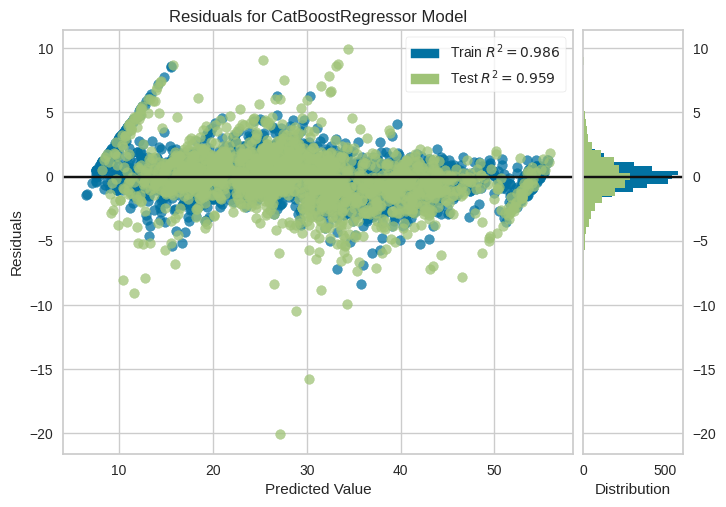

In [67]:
# plot residuals
plot_model(best, plot = 'residuals')

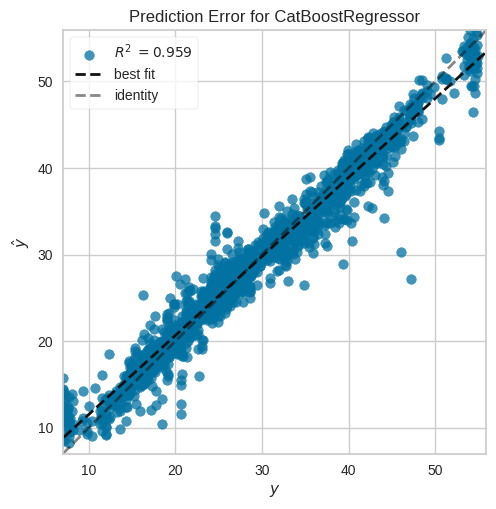

In [68]:
# plot error
plot_model(best, plot = 'error')

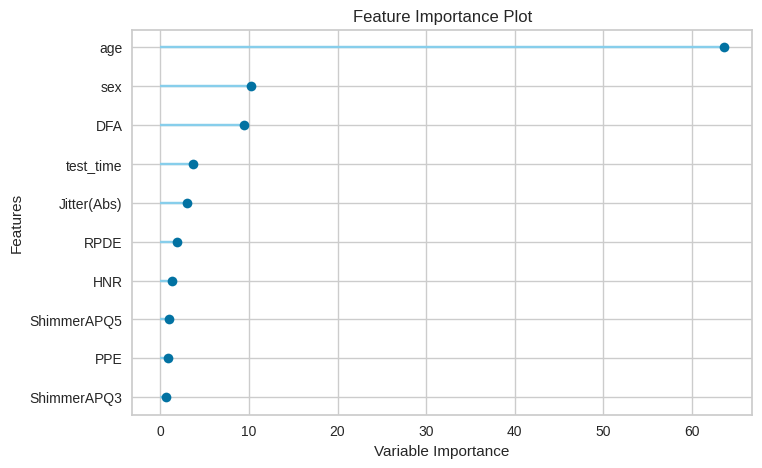

In [69]:
# plot feature importance
plot_model(best, plot = 'feature')

___

# 🔮 **Prediction**
*The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.*

It's purpose is to make predictions on unseen data using a trained model.

**Inputs:** Trained model and dataset <br>
**Output:** Prediction_label

In [70]:
# predict on test set, we are passing the catboost regressor model
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.5040,4.7911,2.1889,0.9591,0.1019,0.0668


In [83]:
# show predictions of the dataframe, it will be under prediction_label column
holdout_pred.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,...,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,total_UPDRS,prediction_label
2661,55,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,0.00886,...,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,0,26.663000,24.559035
1172,73,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,0.00555,...,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,1,29.031000,28.260745
1877,58,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,0.01122,...,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,1,25.417999,23.996141
547,74,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,0.01970,...,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,0,27.139000,28.625403
5068,56,105.790001,0.00545,0.000028,0.00320,0.00296,0.00961,0.02196,0.192,0.01252,...,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,1,43.201000,42.451434


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `total_UPDRS`. We can then use the new data frame without labels for scoring.

In [80]:
# copy data and drop the target column

new_data = data.copy()

new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0


In [82]:
# predict model on new_data
#input: the model, and the new data given
predictions = predict_model(best, data = new_data)
predictions.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,prediction_label
0,72,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,0,33.670093
1,72,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,0,35.765702
2,72,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,0,35.560386
3,72,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,0,36.482457
4,72,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,0,36.652935


___

## 💾 **Save Model**


Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [85]:
# save pipeline
save_model(best, 'parkinsons_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'test_time', 'Jitter(%)',
                                              'Jitter(Abs)', 'Jitter:RAP',
                                              'Jitter:PPQ5', 'Jitter:DDP',
                                              'Shimmer', 'Shimmer(dB)',
                                              'Shimmer:APQ3', 'Shimmer:APQ5',
                                              'Shimmer:APQ11', 'Shimmer:DDA',
                                              'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
                                              'sex'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(t

In [86]:
# load pipeline
loaded_best_pipeline = load_model('parkinsons_regression')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'test_time', 'Jitter(%)',
                                             'Jitter(Abs)', 'Jitter:RAP',
                                             'Jitter:PPQ5', 'Jitter:DDP',
                                             'Shimmer', 'Shimmer(dB)',
                                             'Shimmer:APQ3', 'Shimmer:APQ5',
                                             'Shimmer:APQ11', 'Shimmer:DDA',
                                             'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
                                             'sex'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7a82873f7610>)])